In [15]:
import pandas as  pd
import sklearn as sk
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    brier_score_loss,
    RocCurveDisplay
)
data = pd.read_csv('S05-hw-dataset.csv')
metrics_to_see =['age','income','years_employed','credit_score','debt_to_income','num_credit_cards','num_late_payments','has_mortgage','has_car_loan','savings_balance','checking_balance','region_risk_score','active_loans','customer_tenure_years']
target = 'default'
train, test= sk.model_selection.train_test_split(data,random_state=42,test_size=0.25,stratify=data[target])
data.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [16]:
data.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [18]:
data.value_counts('default',normalize=True)

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

Отдельная прверка на невозможные значения не проводилась, однако было замечено что имеются случаи, когда разница между возрастом и стажем работы меньше 14 лет.

In [19]:

dum=sk.dummy.DummyClassifier(strategy="stratified")
dum.fit(train[metrics_to_see],train[target])
bpred=dum.predict(test[metrics_to_see])

print("Accuracy :", accuracy_score(test[target], bpred))
print("Precision:", precision_score(test[target], bpred, zero_division=0))

Accuracy : 0.5106666666666667
Precision: 0.4019933554817276


In [20]:
for c in [0.01, 0.1, 1.0, 10.0]:
    pipe = sk.pipeline.Pipeline([
       ("scaler", sk.preprocessing.StandardScaler()),
       ("logreg", sk.linear_model.LogisticRegression(max_iter=1000,C=c))
       
   ])
    pipe.fit(train[metrics_to_see],train[target])
    lpred=pipe.predict(test[metrics_to_see])
    print(c,":")
    print("Accuracy :", accuracy_score(test[target], lpred))
    print("Precision:", precision_score(test[target], lpred, zero_division=0))

0.01 :
Accuracy : 0.796
Precision: 0.8015564202334631
0.1 :
Accuracy : 0.7933333333333333
Precision: 0.7822878228782287
1.0 :
Accuracy : 0.7946666666666666
Precision: 0.7830882352941176
10.0 :
Accuracy : 0.7946666666666666
Precision: 0.7830882352941176


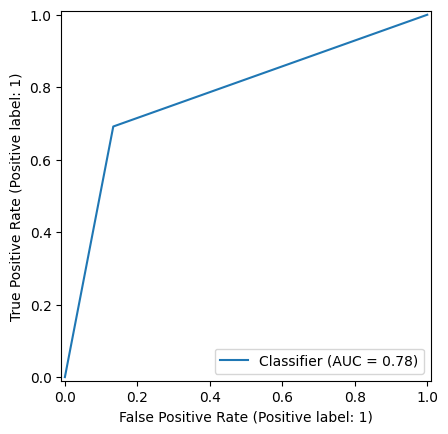

In [21]:

RocCurveDisplay.from_predictions(test[target], lpred)

Логистическая регрессия точнее угадывает.
Изменение `C` незначительно повлияло на качество.
Выгоднее использовать логистическую регрессию, тк при незначительном увеличении трудозатрат увеличивается точность.